In [248]:
"def gains"
%pylab inline 
import math 
import numpy as np
import matplotlib.pyplot as plt



"S1 = Hawk"
"S2 = Dove"
"S3 = Bourgeois"

def phawk(strat) : 
    if strat == "S1" :
        G = (R-P)/2
    elif strat == "S2" :
            G = R
    elif strat == "S3" : 
            G = (3*R - P)/3
    return G

def pdove(strat) : 
    if strat == "S1" :
        G = 0
    elif strat == "S2" :
            G = R/2
    elif strat == "S3" : 
            G = R/4
    return G

def pbou(strat) : 
    if strat == "S1" :
        G = (R-P)/4 
    elif strat == "S2" :
            G = 3*R/4
    elif strat == "S3" : 
            G = R/2 
    return G

print (P,R)
phawk("S1")




Populating the interactive namespace from numpy and matplotlib
4 5


/Users/quentingyselinck/anaconda3/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['figure', 'pi']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


0.5

In [249]:
"Rencontre"

def rencontre (strat1, strat2) : 
    Nbcoups = 10
    "score hawk"
    Sh = 0 
    "score dove"
    Sd = 0 
    "score bourgeois"
    Sb = 0 

    for i in range(Nbcoups) : 
        if (strat1 == "S1" and strat2 == "S2") or (strat1 == "S2" and strat2 == "S1") : 
            Sh = Sh + phawk("S2")
            Sd = Sd + pdove("S1")
        elif (strat1 == "S2" and strat2 == "S3") or (strat1 == "S3" and strat2 == "S2") : 
            Sd += pdove("S3")
            Sb += pbou("S2")
        elif (strat1 == "S1" and strat2 == "S3") or (strat1 == "S3" and strat2 == "S1") :
            Sb += pbou("S1")
            Sh += phawk("S3")
    print(Sh ,Sd ,Sb)

rencontre("S2","S1")




50 0 0


[0.33333333 0.38442211 0.44981413 0.53137517 0.6274149  0.72890485
 0.82053149 0.89149865 0.93884689 0.96721893 0.98295869]
[0.33333333 0.28643216 0.23605948 0.18558077 0.13615455 0.09216038
 0.05751729 0.03325712 0.01816541 0.00952663 0.00489064]
[0.33333333 0.32914573 0.31412639 0.28304406 0.23643054 0.17893477
 0.12195122 0.07524423 0.0429877  0.02325444 0.01215067]


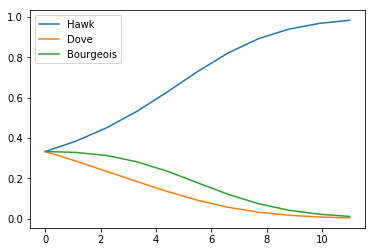

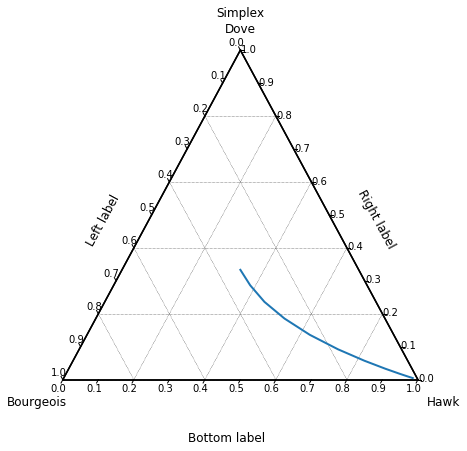

In [250]:
%matplotlib inline

import ternary
Nh=100
Nd=100
Nb=100

pop = Nh + Nd + Nb
R = 5
P = 4
"Nb périodes"
N = 10

"liste score"
lh = zeros(N+1) 
ld = zeros(N+1) 
lb = zeros(N+1) 
lh[0] = Nh/pop
ld[0]= Nd/pop
lb[0]= Nb/pop

pi = (Nh/pop, Nd/pop, Nb/pop)
points = [pi]
"score moyen attention fonction rencontre"
Sth = 0 
Std = 0
Stb = 0
Sm = 0



"tt les indiv se rencontrent 1 fois"
for j in range(N):
    i=1
    Sth = 0 
    Std = 0
    Stb = 0
    Sm = 0

    while i <= Nh :
        Sth = Sth + (Nh-i)*phawk("S1")+Nd*phawk("S2")+Nb*phawk("S3")
        i += 1
    i = 1
    while i <= Nd : 
        Std = Std + Nh*pdove("S1")+(Nd-i)*pdove("S2")+Nb*pdove("S3")
        i += 1
    i = 1
    while i <= Nb :
        Stb = Stb + Nh*pbou("S1")+Nd*pbou("S2")+(Nb-i)*pbou("S3")
        i += 1
    
    moyen = int((Sth + Std + Stb)/3)
    if moyen == 0 :
        moyen = 1
        
    scoretotal = Sth + Std + Stb
    
    Nh = int((Nh + Nh*Sth/abs(scoretotal)))
    Nd = int((Nd + Nd*Std/abs(scoretotal)))
    Nb = int((Nb + Nb*Stb/abs(scoretotal)))

    if Nh < 0 :
        Nh = 0
    if Nd < 0 : 
        Nd = 0
    if Nb < 0 :
        Nb = 0
       
    total = Nh+Nd+Nb
    
    proph = Nh / total
    propd = Nd / total
    propb = Nb / total
           

    lh[j+1] = proph
    ld[j+1] = propd
    lb[j+1] = propb
    
    "liste des points"
    Pi = (proph, propd, propb)
    points.append(Pi)

print(lh)
print(ld)
print(lb)

t = linspace(0,N+1,N+1)

plot(t,lh,label='Hawk')
plot(t,ld,label='Dove')
plot(t,lb,label='Bourgeois')
plt.legend()
    
"simplex"
figure, tax = ternary.figure(scale=1)
figure.set_size_inches(7, 7)
fontsize = 12
offset = 0.14
tax.boundary()
tax.gridlines(multiple=0.2, color="black")


tax.set_title("Simplex\n", fontsize=fontsize)

tax.left_axis_label("Left label ", fontsize=fontsize, offset=offset)
tax.right_axis_label("Right label", fontsize=fontsize, offset=offset)
tax.bottom_axis_label("Bottom label", fontsize=fontsize, offset=offset)

tax.right_corner_label("Hawk", fontsize=fontsize)
tax.top_corner_label("Dove", fontsize=fontsize,offset= 0.17)
tax.left_corner_label("Bourgeois", fontsize=fontsize)

tax.get_axes().axis('off')
tax.clear_matplotlib_ticks()
tax.ticks(axis='lbr', linewidth=1, multiple=0.1, tick_formats="%.1f")
tax.boundary()

tax.plot(points, linewidth=2.0, label="évolution")







845.0
285.0
562.5
564
819.0
97.5
333.0
416
1053.0
10.5
175.0
412
2760.0
0
71.5
943
20100.0
0
0
6700
[ 10.  14.  27.  69. 201. 603.]
[10.  5.  1.  0.  0.  0.]
[10.  9.  7.  2.  0.  0.]


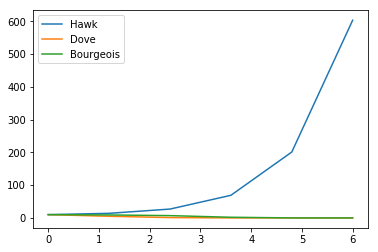

In [147]:
Nh1=10
Nd1=10
Nb1=10
pop = Nh1 + Nd1 + Nb1
R = 5
P = 6
"Nb périodes"
N = 5

"liste score"
lh1 = zeros(N+1) 
ld1 = zeros(N+1) 
lb1 = zeros(N+1) 
lh1[0]=Nh1
ld1[0]=Nd1
lb1[0]=Nb1
"score moyen attention fonction rencontre"
Sth1 = 0 
Std1 = 0
Stb1 = 0
Sm1 = 0

"tt les indiv se rencontrent 1 fois"
for j in range(N):
    i=1
    Sth1 = 0 
    Std1 = 0
    Stb1 = 0
    Sm1 = 0

    while i <= Nh1 :
        Sth1 = Sth1 + (Nh1-i)*1+Nd1*5+(Nb1/2)*1+(Nb1/2)*5
        i += 1
    i = 1
    while i <= Nd1 : 
        Std1 = Std1 + Nh1*0+(Nd1-i)*3+(Nb1/2)*0+(Nb1/2)*3
        i += 1
    i = 1
    while i <= Nb1 :
        Stb1 = Stb1 + (Nh1/2)*0 + (Nh1/2)*1 + (Nd1/2)*3 + (Nd1/2)*5 +((Nb1-i)/2)*5 + ((Nb1-i)/2)*0
        i += 1
    
    moyen1 = int((Sth1 + Std1 + Stb1)/3)
    
    Nh1 = int(Nh1 + (Nh1*(Sth1- moyen1)/moyen1))
    Nd1 = int(Nd1 + (Nd1*(Std1- moyen1)/moyen1))
    Nb1 = int(Nb1 + (Nb1*(Stb1- moyen1)/moyen1))
    print(Sth1)
    print(Std1)
    print(Stb1)
    print(moyen1)
    lh1[j+1] = Nh1
    ld1[j+1] = Nd1
    lb1[j+1] = Nb1

print(lh1)
print(ld1)
print(lb1)

t = linspace(0,N+1,N+1)

plot(t,lh1,label='Hawk')
plot(t,ld1,label='Dove')
plot(t,lb1,label='Bourgeois')
plt.legend()

In [108]:
%matplotlib inline

import ternary

print("Version", ternary.__version__)

Version 1.0.6


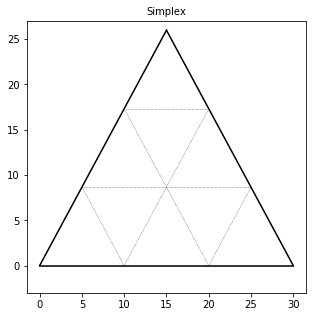

In [116]:
figure, tax = ternary.figure(scale=30)
figure.set_size_inches(5, 5)

tax.boundary()
tax.gridlines(multiple=10, color="black")
tax.set_title("Simplex", fontsize=10)


In [ ]:
tax.plot(t,lh,linewidth=2.0,label="Hawk")
tax.plot(t,ld, linewidth=2.0, label="Dove")
tax.plot(t,lb, linewidth=2.0, label="Bourgeois")